# REGRESION LINEAL 

Lo que hemos visto son los requisitos para implementar modelos de prediccion, el 20% es crear modelos de prediccion 
el 80% del trabajo es la limpieza de los datos. \
Algorimos que nos ayuden a crear modelos, la primera tecnica que se suele usar es la regresion lineal y se quiere tener una 
variable de salida, una prediccion.

## ¿Porque se modela con un modelo lineal?
 MODELOS DE REGRESION LINEAL \
EL primero sera un modelo con datos simulados, para dos variables, la "x" y la "y", para ver como predecir la "y" estimada. \
Se busca tener :
* y = a + b * x \
para ello, generaremos dos distribuciones de numeros, 
* X : 100 valores distribuidos segun una N(1.5, 2.5) \
 para las predicciones : 
 * ye = 5 + 1.9 * x + e
* e estara distribuido segun una N(O, 0.8)

In [2]:
import pandas as pd 
import numpy as np

In [3]:
#generaremos la distribucion de X. 
x = 1.5 + 2.5 * np.random.randn(100)

In [4]:
x

array([ 2.17572295,  1.49649243, -5.24787773,  4.21378884,  2.40446084,
        2.75215578, -0.76320855,  1.62281071,  0.77450968, -2.04967919,
        0.82782674,  0.28289097, -0.47918219,  0.76228847, -0.24630615,
       -2.1475699 ,  3.29460934, -3.1763642 ,  3.15038379, -0.42914554,
       -1.15302927,  2.61227709,  0.26384128,  1.34207491,  4.90939744,
        5.56451037,  3.62660865,  0.42272044,  2.78897163, -0.02830615,
        0.42011885,  3.92623847,  1.73724366,  0.08657602,  2.61900001,
        1.43040802, -0.93781895,  3.23163809, -0.09353755,  2.46636038,
        3.69543617,  4.40189638,  2.74030553,  3.34454735,  3.41928264,
        3.67958384, -0.9472073 ,  6.15255661,  1.39501424,  5.8176556 ,
        1.63180906,  4.76583643, -2.07095955, -4.85445852,  1.31629466,
        2.2073169 ,  1.53560348,  3.78686768,  3.03318652,  7.31812781,
        0.42945371,  2.40938383, -1.41003241, -0.28862066,  1.21036621,
        1.23053927,  3.47865481,  2.44665049, -1.40811233, -0.08

In [5]:
residuo = 0 + 0.8 * np.random.randn(100)

In [6]:
#La Y de la prediccion, del modelo exacto
y_pred = 5 + 1.9 * x

In [7]:
y_pred # Los datos que nos devolveria el modelo lineal. 

array([ 9.1338736 ,  7.84333562, -4.97096768, 13.0061988 ,  9.5684756 ,
       10.22909599,  3.54990375,  8.08334035,  6.47156839,  1.10560954,
        6.57287081,  5.53749285,  4.08955383,  6.4483481 ,  4.53201832,
        0.9196172 , 11.25975775, -1.03509198, 10.98572921,  4.18462348,
        2.80924439,  9.96332648,  5.50129844,  7.54994233, 14.32785514,
       15.5725697 , 11.89055643,  5.80316884, 10.2990461 ,  4.94621832,
        5.79822582, 12.4598531 ,  8.30076295,  5.16449443,  9.97610001,
        7.71777524,  3.218144  , 11.14011237,  4.82227865,  9.68608472,
       12.02132872, 13.36360311, 10.20658051, 11.35463997, 11.49663701,
       11.9912093 ,  3.20030613, 16.68985756,  7.65052705, 16.05354563,
        8.10043722, 14.05508921,  1.06517685, -4.22347119,  7.50095985,
        9.19390211,  7.91764661, 12.1950486 , 10.76305439, 18.90444285,
        5.81596204,  9.57782928,  2.32093843,  4.45162075,  7.29969579,
        7.3380246 , 11.60944413,  9.64863592,  2.32458658,  4.84

In [8]:
#Lo que realmente nosotros observamos, los datos  de lo que constamos : 
y_act = 5 + 1.9 * x + residuo 

In [9]:
y_act

array([ 9.27686706,  6.43457413, -5.07426483, 12.86792449,  9.98280869,
        9.35921902,  2.77266482,  7.26764905,  6.72865194,  1.2677671 ,
        7.65340109,  5.61960444,  5.06339062,  6.30461858,  4.04370678,
        2.24583217, 10.79087816, -1.78863063, 10.83818416,  3.97390668,
        1.87697269, 10.94328185,  4.72460096,  7.87030018, 14.80697358,
       15.15380624, 10.80358613,  6.07847233,  9.16485669,  4.85705549,
        7.62136005, 13.81175252,  7.47046741,  4.28833017,  9.43524419,
        7.58335402,  2.26029572, 10.73290278,  4.8368336 , 10.57853584,
       11.33605006, 14.2068455 ,  9.82940101, 12.16644555, 10.90255884,
       11.68675429,  3.30853182, 16.54333057,  7.77787595, 15.76292692,
        8.31442851, 15.57643405,  1.28492908, -5.40597046,  6.9520797 ,
        8.89610559,  7.94432259, 13.67619311, 10.56183037, 18.77894337,
        6.34614209,  9.64411974,  1.7004381 ,  5.81001726,  7.11860403,
        8.04487857, 12.27537106, 10.13205694,  1.26301507,  4.78

In [10]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [11]:
data = pd.DataFrame(
    {
    'x' : x_list,
    'y_actual' : y_act_list, 
    'y_prediccion' : y_pred_list
    }
)

In [12]:
data.head() #Los "y_actual" son los que se registran y los "y_prediccion" es la prediccion que haria el modelo lineal. 
#esto nos permite responder cuando hacemos el modelo lineal, 
#lo que simulamos es que alguien ya ha hizo el modelo lineal, basandose en unos datos y lo que comprobamos 
#como de preciso se supone que es la ecuacion que estamos usando para hacer una prediccion, con respecto 
#a los valores que realmente tenemos. 

,x,y_actual,y_prediccion
0,2.175723,9.276867,9.133874
1,1.496492,6.434574,7.843336
2,-5.247878,-5.074265,-4.970968
3,4.213789,12.867924,13.006199
4,2.404461,9.982809,9.568476


In [13]:
#Haremos un plot del valor actual, el que realmente somos capaces de medir y la prediccion del mismo. 
import matplotlib.pyplot as plt 

In [14]:
#grafico que junta todo en el mismo sitio 
%matplotlib inline

In [46]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]#vector que siempre tiene el promedio, tantas veces como puntos tenga x. 

In [16]:
y_mean

[7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334448825,
 7.8940060334

Text(0.5, 1.0, 'Valor Actual vs Prediccion')

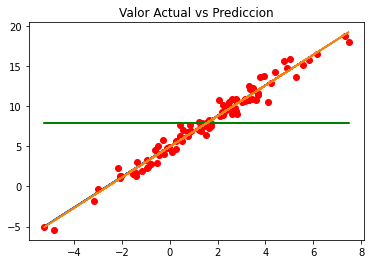

In [47]:
plt.plot(x , y_pred)
plt.plot(x , y_act , "ro") #"ro" es el color de los circulos. 
plt.plot(x , y_mean, "g" ) #promedio de todas las "y". 
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Prediccion")
#Nos damos cuenta que el grafico dibuja los puntos de color azul, que es el modelo lineal, 
#los circulos de color rojo son exactamente los valores de la muestra que hemos tomados, los actuales. 
#los actuales estan muy cerca de la prediccion, estan muy bien conseguidos. 

In [18]:
#¿Porque pintamos el promedio de la y _actuales, en el mismo grafico? 
# Esto se debe a que cuando no se tiene un buen modelo predictor muy bueno, lo mejor que se hace es elegir el promedio de los valores 
#observados y decir si ese promedio sera o no una buena forma de predecir los valores. 
#Otro punto a juzgar la eficacia del modelo, es que si se tienen datos que contienen dos variables(entrada y salida)
#el programa estadistico va a generar algunos valores de alpha y beta, ¿Como podemos entender los valores que nos va a devolver en python o R?
#Añadiremos el promedio para tener una mejor perspectiva de comparacion. 
#Añadir una linea horizontal, sin importar el promedio de las x. 



In [19]:
data["SSR"] = (data["y_prediccion"] - np.mean(y_act))**2
data["SSD"] = (data["y_prediccion"]-data["y_actual"])**2
data["SST"] = (data["y_actual"] - np.mean(y_act))**2

In [20]:
data.head() #Distribucion de cada una de las diferencias, en particular se podria calcular 
#la suma de los cuadrados de la regresion. 

,x,y_actual,y_prediccion,SSR,SSD,SST
0,2.175723,9.276867,9.133874,1.537272,0.020447,1.912305
1,1.496492,6.434574,7.843336,0.002567,1.984609,2.129941
2,-5.247878,-5.074265,-4.970968,165.507549,0.010670,168.176049
3,4.213789,12.867924,13.006199,26.134515,0.019120,24.739865
4,2.404461,9.982809,9.568476,2.803848,0.171672,4.363097


In [21]:
#Suma de los cuadrados de la regresion, de la diferencia y de los cuadrados totales. 
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [22]:
SSR

2027.0343791781759

In [23]:
SSD #Esto es lo que no se puede explicar con el modelo, de los 1904 puntos totales. el modelo no explica el 3%

62.46254527363311

In [24]:
SST

2104.29531945683

In [25]:
SSR + SSD

2089.496924451809

In [26]:
R2 = SSR/SST 

In [27]:
R2 #Nos sugiere que la prediccion de "y" es un valor muy acertado para predecir el valor actual. 

0.9632841742486045

(array([60., 20.,  8.,  6.,  3.,  0.,  2.,  0.,  0.,  1.]),
 array([2.11846314e-04, 5.08582097e-01, 1.01695235e+00, 1.52532260e+00,
        2.03369285e+00, 2.54206310e+00, 3.05043335e+00, 3.55880360e+00,
        4.06717386e+00, 4.57554411e+00, 5.08391436e+00]),
 <a list of 10 Patch objects>)

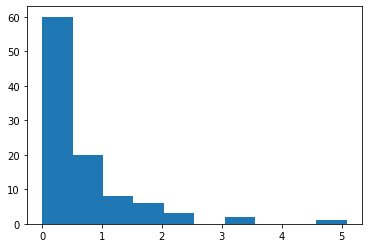

In [28]:
plt.hist(data["SSD"])

## 82. ENCONTRANDO LOS COEFICIENTES OPTIMOS DE LA REGRESION 

Utilizaremos el valor de la x como variable predictora para intentar predecir el valor actual. 
Calcularemos la recta de regresion lineal. 

In [29]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean , y_mean

(1.5473981442629472, 7.894006033444884)

In [30]:
#calcularemos el numerador de beta. 
data["beta_n"] = (data["x"] - x_mean) * (data["y_actual"] - y_mean)
data["beta_d"] = (data["x"] - x_mean)**2

In [31]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [32]:
alpha = y_mean - beta * x_mean

In [33]:
alpha, beta #Esto lo que indica es que el modelo "y" sera 

(4.942908858145576, 1.9071350099782933)

y = 5.068702093649035 + 1.92248453230605 * x 
* ¿La prediccion sera mejor con el modelo original que teniamos o con este que acabamos de crear? 

In [34]:
data["y_model"] = alpha + beta * data["x"]

In [35]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,2.175723,9.276867,9.133874,1.537272,0.020447,1.912305,0.868886,0.394792,9.092306
1,1.496492,6.434574,7.843336,0.002567,1.984609,2.129941,0.074293,0.002591,7.796922
2,-5.247878,-5.074265,-4.970968,165.507549,0.010670,168.176049,88.122978,46.175774,-5.065502
3,4.213789,12.867924,13.006199,26.134515,0.019120,24.739865,13.262410,7.109639,12.979173
4,2.404461,9.982809,9.568476,2.803848,0.171672,4.363097,1.790235,0.734556,9.528540


In [42]:
#Ver con R^2 si se ajusta o no con nuestro modelo. 
data["SSR"] = sum((data["y_model"] - y_mean)**2)
data["SSD"] = sum((data["y_model"]-data["y_actual"])**2)
data["SST"] = sum((data["y_actual"] - y_mean)**2)

In [43]:
SSR, SSD, SST

(2027.0343791781759, 62.46254527363311, 2104.29531945683)

In [44]:
R2 = SSR / SST #Es una mejora apenas significativa, respecto a la otra. 

In [41]:
R2

0.9632841742486045

In [ ]:
#Lo que haremos ahora es en el mismo grafico de arriba, incorporar ahora nuestro modelo. 


# 83. INTERPRETAR LOS PARAMETROS DE LA REGRESION

In [ ]:
#Hay otros estadisticos y parametros que nos permiten ver si una regresion es buena o mala. 
#existen otros estadisticos aparte de R2. 
#Veremos estadistictos que nos ayudaran a trabajar varios aspectos:

 $\textbf{P-Value}$ \
$H_{0} : \beta = 0$ \
$H_{1} : \beta \neg0$ 

Relacionado con el contraste de hipotesis para descartar o aceptar de entrada si  beta = 0 o no lo es. \
Si el P valor es menor que el nivel de significacion, rechazamos la hipotesis nula y aceptamos que existe una relacion lineal entre x e y. 

$\textbf{Estadistico F}$ \
Este es en el caso de una regresion multiple, el modelo tiene mas parametros. \
Se realiza de igual manera un contraste de hipotesis para k betas.
 * En el caso de una regresion lineal multiple 

$\textbf{Error Estandar Residual }$




# 84. IMPLEMENTAR UNA REGRESION LINEAL EN PYTHON

Usaremos un DataFrame. \
Primero crearemos un modelo de regresion lineal simple y luego un modelo multiple.\
Existen varios metodos:\
$\textbf{1. El paquete statsmodel para regresión lineal}$

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
data = pd.read_csv("C:/Users/URIEL/Downloads/python-ml-course-master (2)/datasets/ads/Advertising.csv")

In [3]:
data.head() #Contiene el gasto de publicidad en television, radio y periodico para un producto en particular 
#y el resultado en ventas que se ha observado despues de esas 200 campañas de marketing. 
#Existe una correlacion de marketing y las ventas que se han producido. 

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
#Haremos una regresion lineal simple 
import statsmodels.formula.api as smf #Con este paquete crearemos un modelo lineal. 

In [5]:
lm = smf.ols(formula = "Sales~TV",  data = data).fit() 
#Formula = Indico ventar variable predictora en funcion de TV 
#Data = es el dataset en uso 
#fit = metodo que crea el modelo ajustandose a esos parametros. 

In [6]:
lm

In [7]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal predictivo seria: \
$\textbf{Sales = 7.032594 + 0.047537(TV)}$

Aqui hemos asumido una relacion lineal entre los costes de publicidad en TV y las ventas.\
La ecuacion implica que un incremento en 100 unidades de publicidad en TV se traduce en 4.7 ventas adicionales.\
Los valores de estos parametros son estimados y por lo tanto tienen un p-value asociado a cada uno de ellos.


In [8]:
lm.pvalues #Son muy pequeños, garantizamos con probabilidad segura que no es cero, para ninguno de los dos parametros. 

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [9]:
lm.rsquared #valor de R2 

0.6118750508500712

In [10]:
#El valor de R2 ajustado 
lm.rsquared_adj

0.6099148238341625

In [11]:
#Si queremos la vision general de todo el modelo con todos los parametros a la vez y poder mirar todo. 
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           1.47e-42
Time:                        22:29:41   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#¿Yo puedo utilizar el modelo para predecir valores a futuro? 
#si, si se puede, para predecir las ventas futuras. 

In [13]:
sales_pred = lm.predict(pd.DataFrame(data["TV"])) 
sales_pred #Esta es la columna que ha predecido el modelo, en base a la columna x de entrada. 
#¿Se ajusta o no se ajusta? 

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

In [14]:
#Podriamos hacer un plot de esta prediccion vs los ajustes reales 
import matplotlib.pyplot as plt 

In [15]:
%matplotlib inline  #para hacer graficos con varias instrucciones a la vez

UsageError: unrecognized arguments: #para hacer graficos con varias instrucciones a la vez


In [ ]:
data.plot(kind = "scatter", x = "TV", y = "Sales")
plt.plot(pd.DataFrame(data["TV"]), sales_pred, c = "red", linewidth = 2) #color rojo y en formato linea.
#La linea roja es el modelo lineal que mejor se ajusta y que se ha obtenido en forma de modelo. 
#los puntos azules son los datos originales del dataset. 

In [16]:
#Columna de las predicciones.
data["sales_pred"] = 7.032594 + 0.047537 * data["TV"]

In [17]:
#Columna Error Estandar Residual. 
data["RSE"] = (data["Sales"] - data["sales_pred"]) **2

In [18]:
SSD = sum(data["RSE"])
SSD

2102.5305838896525

In [19]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE #es la desviacion tipica de los residuos. ¿Cuanto represeta esto respecto al promedio total de ventas? 
#3.5 ptos arriba y 3.5 ventas abajo 

3.258656369238098

In [20]:
sales_m = np.mean(data["Sales"])
sales_m #Numero de ventas promedio 

14.022500000000003

In [21]:
error = RSE / sales_m
error #Error promedio, estariamos hablando del 23% que no queda explicado del modelo, de la varianza del modelo. 

0.2323876890168014

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <a list of 10 Patch objects>)

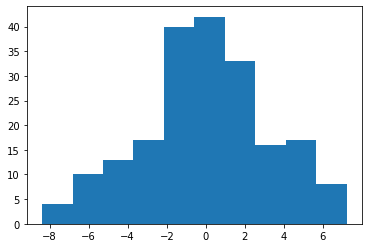

In [22]:
#Histograma de los errores. 
plt.hist((data["Sales"] - data["sales_pred"])) #Como se distribuyen los errores respecto del modelo. 
#Segun una normal se distribuyen los errores. 

Nos gustaria reducir el 23% de errores, aunque no podemos hacer mucho pues recordando el R2 = 0.6118, lo podemos mejorar un poco. 


¿Que forma seria la ideal para mejorar el resultado del R2 y de reducir la suma de los errores residuales? \
$\textbf{R} = $ Existen otros dos canales de informacion (Radio y Periodico) que no hemos utilizado para crear el modelo, talvez el modelo no deberia basarse unicamente en el gasto de TV sino que deberiamos pensar en algun modo de incorporar el resto de informacion y crear un modelo de regresion lineal multiple. 

## 85. REGRESION LINEAL MULTIPLE 

Vamos a elaborar un modelo lineal que involucre mas de una variable predictora, "Modelo de Regresion lineal multiple"
$\textbf{El paquete statsmodel para regresion multiple}$
* El modelo ya no solo tendra una sola pendiente para una variable predictora, tendra una diferente para cada una de las, variables predictoras. Tendra que predecir las ventas no solo en funcion del gasto de TV, sino tambien del gasto del periodico y del radio. 
* Cada uno de esas variables tenndra un P-Valor asociado, si este es un valor extremadamente grande, esta podra ser eliminada del modelo ya que indicara que no es un buen predictor del resultado del mismo.\
Como manejar una regresion multiple nos da la posibilidad de usar mas variables predictoras, se incrementa la eficacia del modelo, aunque aumenta tambien la complejidad de la creacion del modelo. \
Ya hemos usado: 
* Sales ~ TV  
Podriamos usar: 
* Sales ~ Newspaper 
* Sales ~ Radio 
* Sales ~ TV + Newspaper 
* Sales ~ TV + Radio 
* Sales ~ Newspaper + Radio 
* Sales ~ Newspaper + TV + Radio \
Tendriamos varias variables predictoras. 

Reglas a seguir, para poder navegar hasta llegar al modelo lineal mas eficiente: 
* Empezar con un modelo lineal que usara todas las variables como predictoras y nos quedaramos con las variables con menores p-valores y eliminar las otras. 

In [23]:
#Partiremos del modelo que ya tenemos e iremos añadiendo las variables para ver si la eficacia cambia. 
#Añadir el newspaper al modelo existente. 
lm2 = smf.ols(formula = "Sales ~ TV + Newspaper", data = data).fit()

In [24]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [25]:
#Podemos comprobar sus P - Values 

lm2.pvalues
#Todos siguen siendo muy pequeños, el modelo sugiere que los 3 parametros que hemos encontrado son buenos y no son nulos. 

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

La ecuacion del modelo se convertiria en: \
$\textbf{Sales = 5.774948 + 0.046901(TV) + 0.044219(Newspaper)}$

In [26]:
#Para obtener R2 y R2 ajustado: 
lm2.rsquared

0.6458354938293271

In [27]:
lm2.rsquared_adj

0.6422399150864777

In [28]:
#Haremos unas predicciones: 
sales_pred = lm2.predict(data[["TV", "Newspaper"]]) #Sintaxis para indicar que queremos un subdataset del dataset original.

In [29]:
sales_pred


0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [30]:
#Calcular la desviacion estandar de los residuos. 
SSD = sum((data["Sales"] - sales_pred) **2)
SSD

1918.5618118968273

In [31]:
RSE = np.sqrt(SSD / (len(data)-2-1)) #Siempre es el numero de variables predictoras menos 1 (-2-1)
RSE #En comparacion con el pasado, hemos bajado de 3.25 a 3.12, 

3.120719860252885

In [32]:
#Si queremos comprobar respecto al promedio. 
error = RSE / sales_m 
error #El modelo dejaria de explicar el 22.2 % del modelo, no hay mucha diferencia con el pasado. 

0.22255089037282116

In [33]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           3.95e-45
Time:                        22:29:48   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#Añadir la radio al modelo existente: 
lm3 = smf.ols(formula = "Sales ~ TV + Radio", data = data).fit()

In [35]:
lm3.summary() #Tiene pinta de que este sera mucho mejor. 
#R2 a mejorado considerablemente al añadir la radio. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           4.83e-98
Time:                        22:29:49   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
sales_pred = lm3.predict(data[["TV", "Newspaper", "Radio"]])

In [37]:
SSD = sum((data["Sales"] - sales_pred) **2)
SSD

556.9139800676185

In [38]:
RSE = np.sqrt(SSD / (len(data)-2-1))
RSE

1.6813609125080011

In [39]:
RSE / sales_m #Esto nos dice que el modelo solo deja de explicar en torno a un 12% que es mucho mejor que los modelos anteriores.
#Gasto de radio y tv describen las ventas mucho mejor que si se hubiese analizado por separado. 

0.1199045043685506

In [40]:
lm3 = smf.ols(formula = "Sales ~ TV + Radio + Newspaper", data = data).fit()

In [41]:
lm3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           1.58e-96
Time:                        22:29:51   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* $\textbf{¿Que razon tenemos para explicar esto?}$
* $\textbf{¿Existe alguna relacion, teoria para el hecho de que si incluyo el periodico empeoro el modelo?}$

# 86. EL PROBLEMA DE LA MULTICOLINEALIDAD

La multicolinealidad es la razon por la que nuestro modelo se haya comportado peor cuando agregamos el periodico al modelo final. \
Esta hace referencia a la correlacion entre las variables predictoras del modelo. \
De acuerdo a la matriz de correlacion de la seccion 6, parecer ser que el Periodico esta relacionado con la Radio (0.354104), esta relacion entre dos de las variables predictoras, incrementa la variabilidad del coeficiente estimado para la variable predictora. \
La colinealidad es un problema que necesita tenerse en cuenta para tratarlo correctamente, para variables que estuvieran mas altamente correlacionadas entre ellas, necesitariamos ir mas a detalle y ver cual de ellas conviene mas incluir en el modelo, generando un resultado mas eficiente. 


Las variables que nos dan problemas son : 
* Newspaper ~ TV + Radio entonces R2 VIF = 1 / (1-R2)
* TV ~ Newspaper + Radio entonces R2 VIF = 1 / (1-R2)
* Radio ~ TV + Newspaper entonces R2 VIF = 1 / (1-R2) \ 
    * Si el VIF = 1 las variables no tienen nada de correlacion. 
    * Si el 1 < VIF < 5 las variables estan correlacionadas de forma moderada con otras variables predictoras y todavia pueden formar parte del modelo. 
    * Si VIF > 5 las variables estan altamente correlacionadas y necesitan ser eliminadas del modelo. 


In [43]:
lm_n = smf.ols(formula = "Newspaper ~ TV + Radio", data = data).fit() 

In [44]:
rsquared_n = lm_n.rsquared

In [45]:
VIF = 1 / (1 - rsquared_n)
VIF 

1.1451873787239288

In [47]:
#Haremos lo mismo para la television. 
lm_tv = smf.ols(formula = "TV ~ Newspaper + Radio", data = data).fit()

In [48]:
rsquared_tv = lm_tv.rsquared

In [49]:
VIF = 1 / (1 - rsquared_tv)
VIF

1.0046107849396502

In [50]:
lm_r = smf.ols(formula = "Radio ~ Newspaper + TV", data = data).fit()
rsquared_r = lm_r.rsquared
VIF = 1 / (1 - rsquared_r)
VIF

1.1449519171055353

De esto podemos ver que el periodico y la radio tienen casi el mismo VIF, esto significa que estas dos variables estan absolutamente relacionadas, pero no con la Television, como Radio y Periodico estan relacionadas el indice VIF sera mas grande. 

In [51]:
lm3.summary() #De todos los candidatos posibles, el que mejor podemos utilizar. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           1.58e-96
Time:                        22:36:38   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 87. VALIDANDO NUESTRO MODELO 

Cualquier modelo predictivo que se cree, debe de ser validado para ver como se comporta en diferentes conjuntos de datos, mientras la eficacia del modelo suele mantenerse constante sobre el conjunto de datos con el que se entrena.


In [52]:
#Entrenar y dividir el dataset para hacerlo correctamente. 
data = pd.read_csv("C:/Users/URIEL/Downloads/python-ml-course-master (2)/datasets/ads/Advertising.csv")

In [53]:
a = np.random.randn(len(data))

(array([ 6., 11., 26., 44., 34., 32., 24., 19.,  3.,  1.]),
 array([-2.59142028, -2.03785057, -1.48428086, -0.93071116, -0.37714145,
         0.17642825,  0.72999796,  1.28356766,  1.83713737,  2.39070708,
         2.94427678]),
 <a list of 10 Patch objects>)

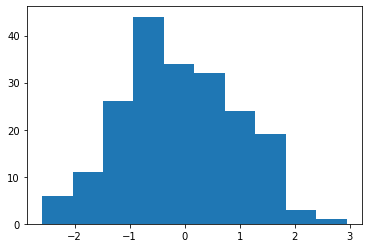

In [54]:
plt.hist(a) #De aqui escogeremos el 80% de los elementos para entrenar y el 20% restante para validar. 

In [56]:
check = (a < 0.8)
training = data[check]
testing = data[~check] #Hemos dividido el conjunto de entrenamiento y de testing. 

In [59]:
len(training), len(testing) #154 filas para el conjunto de entrenamiento y el resto para el conjunto de validacion. 

(154, 46)

In [60]:
#Creamos el modelo solo basado en ese conjunto de datos. 
import statsmodels.formula.api as smf

In [61]:
lm = smf.ols(formula = "Sales ~ TV + Radio", data = training).fit()

In [62]:
lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     582.2
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           1.06e-71
Time:                        22:48:07   Log-Likelihood:                -302.76
No. Observations:                 154   AIC:                             611.5
Df Residuals:                     151   BIC:                             620.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9248      0.355      8.247      0.000       2.224       3.626
TV             0.0471      0.002     28.380      0.000       0.044       0.050
Radio          0.1783      0.010     18.580      0.000       0.159       0.197
==============================================================================
Omnibus:                       47.308   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.628
Skew:                          -1.331   Prob(JB):                     1.91e-23
Kurtosis:                       6.036   Cond. No.                         421.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\textbf{Sales = 2.9248 + 0.0471(TV) + 0.1783 (Radio)}$ \
El Modelo lineal que ha resultado, podemos calcular los diferentes parametros que necesitemos. 

In [63]:
#Validacion del modelo con el conjunto de testing. 
#predecir los valores de venta de esas variables, de las que no se ha utilizado. 
sales_pred = lm.predict(testing)
sales_pred #Estamos aplicando el modelo a unos datos que nunca han sido utilizados para crear el modelo. 
#sin embargo estamos haciendo una prediccion con ellos, comprobaremos, como se separa el conjunto de la prediccion, con el original. 

3      17.415714
6      11.477634
14     18.393055
21     15.003786
33     18.986908
36     23.291022
42     21.677038
48     16.431415
49      8.158303
58     21.685488
64     16.723298
68     18.997149
69     20.951622
73     10.029304
76      4.503937
81     14.938432
85     15.295216
87     15.371264
90     10.117231
93     21.236806
94     10.473878
98     24.096359
99     16.720102
102    17.908920
110    15.010654
111    21.071355
131    15.919583
138     9.565305
144    10.089534
146    15.523027
151    10.115423
155     5.185708
163    17.178081
172     7.430329
176    19.996047
177    12.323340
179    12.499113
180    10.756423
181    14.168015
183    24.122345
189     5.961782
190    12.110410
191     8.402489
192     4.465005
194    16.314855
196     8.230509
dtype: float64

In [64]:
SSD = sum((testing["Sales"] - sales_pred) **2)
SSD

103.44869696638692

In [67]:
#Desviacion estandar de los residuos 
RSE = np.sqrt(SSD / (len(testing) -2-1))
RSE

1.5510588803720802

In [70]:
sales_mean = np.mean(testing["Sales"])
error = RSE / sales_mean 
error #Con esto nos damos cuenta que no hay mucha diferencia respecto al modelo cuando lo habiamos llevado acabo. 
#es el poercentaje sin explicar. 

0.10606319086831527

# 88. EL RESUMEN DE TODOS LOS MODELOS LINEALES CREADOS

In [74]:

from  IPython.display import Image

Resumen de los 4 modelos lineales que hemos creado: \
Tenemos los estadisticos basicos. \
Para que un modelo lineal sea bueno, las variables tienen que elegirse con los siguientes criterios 
* $R^2$ siempre debe incrementar cuando se añade una variable predictora al modelo, aunque esto no es sinonimo. 
* Cuanto menor sea el P-Value para estimar de las variables predictoras, lo mejor es añadir esa variable predictora al modelo. 
* Lo mismo ocurre con F, al añadir una variable predictora, crecera, un incremento es sinonimo de una mejora en el modelo. 
* El valor RSE, error estandar de los residuos, cada que se añade una variable predictora buena, deberia decrementar. 
* Error global, la parte que no somos capaces de explicar respecto al promedio de la variable. \
En conclusion, el mejor modelo es el 3. 


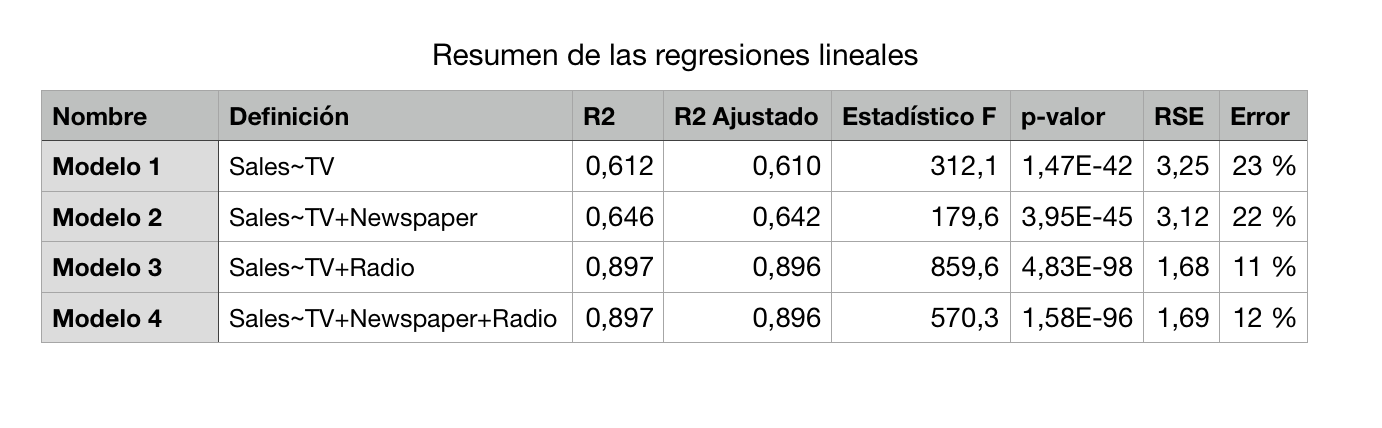

In [73]:
Image(filename = "C:/Users/URIEL/Downloads/python-ml-course-master (2)/notebooks/resources/summary-lm.png")

Aprenderemos a hacer regresion lineal, con otro paquete de python llamado scikit - learn. 

# 89. REGRESION LINEAL CON SCIKIT - LEARN

In [76]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR 

In [78]:
data =pd.read_csv("C:/Users/URIEL/Downloads/python-ml-course-master (2)/datasets/ads/Advertising.csv")

In [80]:
feature_cols = ["TV", "Radio", "Newspaper"] #Variables predictivas, columnas de prediccion. 

In [81]:
#Nos quedaremos con : 
X = data[feature_cols]
Y = data["Sales"] #Variable que sera predecida. 

In [82]:
estimator = SVR(kernel = "linear") #Queremos estimar un modelo lineal. 
selector = RFE(estimator, 2, step = 1) #Numero deseado de variables predictoras (2) y que lo haga en (1) paso.
selector = selector.fit(X,Y) #Esto para que cree el modelo con la X y Y que hemos especificado. 

C:\Users\URIEL\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [83]:
selector.support_ #Ha sido descartado la tercera que es Newspaper, False significa que no ha sido seleccionada la variable. 
#Las dos primeras son las buenas para el modelo. 

array([ True,  True, False])

In [85]:
selector.ranking_ #Nos devuelve un ranking, las variables seleccionadas, aparecen con Ranking = 1. 
#Apartir de aqui podemos hacer la regresion lineal, como ya conocemos. 

array([1, 1, 2])

In [86]:
from sklearn.linear_model import LinearRegression #Implementacion automatica de la regresion lineal. 

In [87]:
X_pred = X[["TV", "Radio"]] #Ya sabemos que las X predictoras son estas. 

In [89]:
lm = LinearRegression() #Creamos el modelo lineal. 
lm.fit(X_pred, Y) #lm debe ajustar las variables predictoras para Y.

LinearRegression()

In [91]:
lm.intercept_ #El alpha. 

2.921099912405138

In [92]:
lm.coef_ #Coeficientes. 

array([0.04575482, 0.18799423])

In [93]:
lm.score(X_pred, Y) #El valor de R2. 

0.8971942610828957

¿Que pasa con alguna de las variables cuando en lugar de ser un numero, es un categoria?

# 90. MODELOS LINEALES CON VARIABLES CATEGORICAS

La regresion lineal que hemos visto hasta ahora involucra variables que solo toman valores numéricos. \
¿Que pasaria si una de las variables $x_{k}$ resulta ser categorica, por ejemplo: \
$x_{k} = 1$ si el cliente es hombre, 0 lo contrario. 

# 91. VARIABLES CATEGORICAS EN UNA REGRESION LINEAL

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("C:/Users/URIEL/Downloads/python-ml-course-master (2)/datasets/ecom-expense/Ecom Expense.csv")

In [3]:
df.head() #Tenemos un dataset con el identificador de la transaccion, la edad del cliente, items que ha comprado, si es 
#hombre o mujer, tipo de distrito al que pertenece, asi como el gasto total. 
#Gender y City Tier son variables categoricas, no podemos elaborar un modelo lineal, con esas palabras, debemos de 
#crear dos variables dummy. 

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [5]:
dummy_gender =pd.get_dummies(df["Gender"], prefix = "Gender")
dummy_city = pd.get_dummies(df["City Tier"], prefix = "City")

In [7]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [8]:
dummy_city.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [9]:
#Tenemos que hacer un join con el dataset original, para poder usarlas en el modelo. 
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [10]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [18]:
df_new = df_new[column_names].join(dummy_city)
df_new.head() #Tenemos ahora 5 nuevas columnas. 

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


Ver como incluir esas variables dummy en el modelo. \
Si suponemos una relacion lineal, para predecir el gasto total de un mes en concreto y queremos que las variables predictoras sean los ingresos mensuales, tiempo de trnasaccion y las dos variables de genero y city tier, tenemos que definir nuestras variables predictoras. 

In [19]:
features_cols = ["Monthly Income", "Transaction Time", "Gender_Female", "Gender_Male", "City_Tier 1", "City_Tier 2", "City_Tier 3"]

In [21]:
X = df_new[features_cols]
Y = df_new["Total Spend"]

In [22]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [23]:
print(lm.intercept_)
print(lm.coef_)

3655.7294076906537
[   0.15297825    0.12372609  -94.15779883   94.15779883  119.6632516
  -16.67901801 -102.9842336 ]


In [24]:
#Para juntar todo, con sus coeficientes respectivos. 
zip(features_cols, lm.coef_)

In [26]:
list(zip(features_cols, lm.coef_))

[('Monthly Income', 0.15297824609320512),
 ('Transaction Time', 0.1237260864262),
 ('Gender_Female', -94.15779883032016),
 ('Gender_Male', 94.15779883032022),
 ('City_Tier 1', 119.66325160390089),
 ('City_Tier 2', -16.679018007990205),
 ('City_Tier 3', -102.98423359591068)]

In [27]:
#Para ver que tan bueno es este modelo. 
lm.score(X,Y) #Factor de R2 muy bajo, probablmente porque no hemos usado todas las variables, a este modelo le falta informacion. 
#hay que agregarle alguna de las variables, para ver si mejora o no el modelo, añadimos "record" al modelo. 

0.19478920552885381

In [29]:
features_cols = ["Monthly Income", "Transaction Time", "Gender_Female", "Gender_Male", 
                 "City_Tier 1", "City_Tier 2", "City_Tier 3", "Record"]

In [30]:
X = df_new[features_cols]
Y = df_new["Total Spend"]

In [31]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [32]:
print(lm.intercept_)
print(lm.coef_)

-79.4171303013718
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [33]:
#Para juntar todo, con sus coeficientes respectivos. 
zip(features_cols, lm.coef_)

In [34]:
list(zip(features_cols, lm.coef_))

[('Monthly Income', 0.1475389804920574),
 ('Transaction Time', 0.15494612549589393),
 ('Gender_Female', -131.02501325554675),
 ('Gender_Male', 131.02501325554664),
 ('City_Tier 1', 76.764326010495),
 ('City_Tier 2', 55.13897430923278),
 ('City_Tier 3', -131.90330031972783),
 ('Record', 772.2334457445645)]

In [35]:
lm.score(X,Y) #Un R2 muy grande, por lo tanto al haber metido esta variable, nos da indicios a que este modelo es mucho mejor. 

0.9179923586131016

El modelo puede sera escrito como:  
  $\textbf{Total_Spend = - 79.4171303013718 + 0.1475389804920574(Monthly Income) + 0.15494612549589393(Transaction Time) - 131.02501325554675(Gender_Female) + 131.02501325554664(Gender_Male) + 76.764326010495(City_Tier 1) + 55.13897430923278(City_Tier 2) + 131.90330031972783(City_Tier 3) + 772.233445744565(Record)}$

In [41]:
#Para calcular la desviacion tipica de los residuos, añandimos una columna al dataframe. #Corregir despues, se supone que esta es la prediccion. 
df_new["prediction"] = -79.4171303013718 + df_new['Monthly Income']*0.14df_new['Monthly Income']*75389804920574 + 0.15494612549589393*df_new['Transaction Time'] - 131.02501325554675*df_new['Gender_Female'] + 131.02501325554664*df_new['Gender_Male'] + 76.764326010495*df_new['City_Tier 1'] + 55.13897430923278*['City_Tier 2'] + 131.90330031972783*['City_Tier 3'] + 772.233445744565*['Record']

TypeError: can't multiply sequence by non-int of type 'float'

In [44]:
df_new["prediction"] = lm.predict(pd.DataFrame(df_new[features_cols]))

In [45]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [ ]:
#Sacar el SSD = 

In [ ]:
#Sacar RSE = 

# 93. ENMASCARADO DE VARIABLES CATEGORICAS 

Si tenemos dos categorias, solo nos basta una columna categorica una columna de dicha variable dummy. \
Tener n categorias, tenemos n-1 dummies.


In [46]:
#Simplifaremos, Eliminaremos variables dummy, redundantes. 
#repetir el proceso de crear las variables dummy. 
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender").iloc[:,1:]
    

In [48]:
dummy_gender.head() #Quitamos la primera columna, solo nos quedamos con las ultimas. 

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [49]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix = "City").iloc[:,1:]

In [52]:
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [56]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [57]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record"]
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [58]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589837),
 ('Gender_Male', 262.0500265110939),
 ('City_Tier 2', -21.62535170126288),
 ('City_Tier 3', -208.66762633022293),
 ('Record', 772.2334457445637)]

In [59]:
#El modelo sigue siendo el mismo, lo unico que ha hecho es que ha aglutinado la informacion. 
lm.score(X,Y)

0.9179923586131016

# 94. TRANSFORMAR LAS VARIABLES EN RELACIONES NO LINEALES

Segundo problema mas tipico, aveces el valor a predecir, no necesariamente tiene una regresion lieal, podrian ser cuadraticas, logaritmitcas, exponenciales. En este caso conviene transformar la variable para ajustarnos a lo que queremos. 
Si necesitamos tener una idea de si la regresion linea, debemos de hacer un plot, con todas las variable predictoras, Si el scatter plot nos dice que la relacion es masomenos lineal, entonces se puede obtener la conclusion de que realemnte si se trata de una variable que si esta ligada de forma lineal a la prediccion. Si el scatter plot no da una relacion lineal, se debe transfromar la variable antes de poderle aplicar la funcion. 

Usaremos un dataset relacionado al consumo de mpg de una serie determinada de coches, informacion sobre el consumo, trae informacion sobre caballos de potencia, cilindros, para una serie determinada de modelos de coche en los años 70 - 80´s. 
La variable de consumo mpg, es la variable predictora. 

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression

In [2]:
data_auto = pd.read_csv("C:/Users/URIEL/Downloads/python-ml-course-master (2)/datasets/auto/auto-mpg.csv")

In [3]:
data_auto.head() #El consumo mpg, distintos tipos de variables, los cilindros pueden ser incluso en categoria. 


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [5]:
data_auto.shape

(406, 9)

In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [6]:
#Verifiquemos si hay valores NA 
data_auto.isna().sum() #Tenemos unicamente 15 valores faltantes. 

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [15]:
data_auto["mpg"] = data_auto["mpg"].dropna()

In [19]:
data_auto["horsepower"] = data_auto["horsepower"].dropna()

In [18]:
#verifiquemos lo que hemos hecho. 
data_auto.isna().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

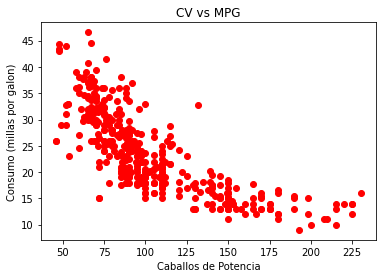

In [21]:
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de Potencia")
plt.ylabel("Consumo (millas por galon)")
plt.title("CV vs MPG")
print()
#Vemos que la representacion la relacion no parece tener una forma lineal, sino curva, asumiremos que tendra una forma o tendencia 
#exponencial o en forma  cuadratica. 
#Primero intentaremos ajustalo a un modelo que sea lineal, ver que tal se comporta y si no es asi, habra que optar por un modelo 
#cuadratico, exponencial o cubico, etc. 

## MODELO DE REGRESION LINEAL 
mpg = a + b * horsepower

In [38]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
X_data = X[:, np.newaxis]

In [28]:
lm = LinearRegression()
lm.fit(X[:, np.newaxis],Y)

LinearRegression()

In [34]:
type(Y)

pandas.core.series.Series

In [36]:
%matplotlib inline

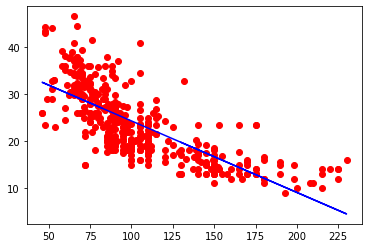

In [37]:
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X[:, np.newaxis]), color = "blue") #Recta de regresion lineal, vemos que se ajusta mesomenos bien. 

In [39]:
lm.score(X_data, Y) #No esta mal el valor R2

0.574653340645025

In [41]:
#Desviacion tipica de los residuos 
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD / (len(X_data) - 1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD , RSE, y_mean , error
#suma de los cuadrados de las diferencias, las desviaciones de los errores,  , Error del 21%. 

(10315.75196006092, 5.046879480825511, 23.51457286432162, 0.21462773361633458)

¿Como mejorariamos ese modelo ? 
Intentar hacer un modelo de regresion lineal cuadratico 
## MODELO DE REGRESION CUADRATICO 
* mpg = a + b* horsepower^2

In [43]:
X_data = X**2
X_data = X_data[:, np.newaxis]

In [44]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression()

In [45]:
lm.score(X_data, Y)

0.4849887034823205

In [46]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD / (len(X_data) - 1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD , RSE, y_mean , error
#El error se incrementa un poco mas, el 23% queda sin explicar, en este caso, no es lo mejor. 

(12490.350340501926, 5.553410772769817, 23.51457286432162, 0.236168898529981)

## MODELO DE REGRESION LINEAL Y CUADRATICO   
* mpg = a + b (horsepower) + c (horsepower)^2

In [47]:
#tenemos que importar un nuevo paquete. 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import linear_model

In [49]:
poly = PolynomialFeatures(degree = 2) #grado del polinomio 

In [50]:
X_data = poly.fit_transform(X[:, np.newaxis])

In [51]:
lm = linear_model.LinearRegression()
lm.fit(X_data, Y)

LinearRegression()

In [52]:
lm.score(X_data, Y) #Este modelo ha aumentado el factor de R2, la haber incluido el coeficiente lineal como el cuadratico. 

0.6439066584257469

In [54]:
lm.intercept_

55.02619244708113

In [53]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

el modelo seria :
## $mpg$ = 55.02619244708113 - 0.43404318 $hp$ + 0.00112615 $hp^2$

In [ ]:
#Si aumentamos el grado de polinomio, podriamos aumentar el valor de R2. 
#hacemos un bucle 
for d in range(2,5): 
    poly = PolynomialFeatures(degree = d)
    X_data = poly.fit_transform(X[:, np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print("Regresion de grado" +str(d))
    print(lm.score(X_data, Y))
    #Vemos que el R2 no mejora al agregarle mas grados a nuestra ecuacion. 

En conclusion nos quedamos con el polinomio de grado 2

# 95. EL PROBLEMA DE LOS OUTLIERS 

Los outliers son puntos que forman parte del dataset, que estan alejados de la tendencia que siguen el resto de puntos. \
con un scatter plot, los outliers se detectan porque estan muy alejados del resto de datos. \
se suele obtar  cuando hay un outlier eliminarlo o tratarlo correctamente para poder hacer el modelo, pues este puede distorsionarlo y reducir la eficacia apesar de que sea un numero muy reducido de puntos, menos del 1% del dataframe. 


In [4]:
data_auto = pd.read_csv("C:/Users/URIEL/Downloads/python-ml-course-master (2)/datasets/auto/auto-mpg.csv")

In [5]:
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


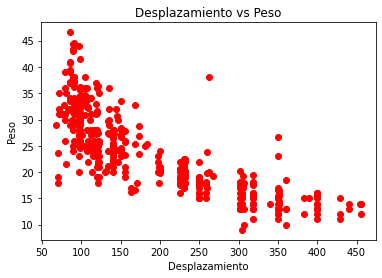

In [20]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")
plt.xlabel("Desplazamiento")
plt.ylabel("Peso")
plt.title("Desplazamiento vs Peso")
print()

In [14]:
#Como tenemos valores NA. 
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X = X[:, np.newaxis]

Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())

In [15]:
#Si llevamos acabo un modelo lineal para ajustarnos a la recta. 
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [16]:
lm.score(X,Y) #Tiene un factor de R2 no tan malo. 
#Y si en lugar de tomarlo de esa manera, quitamos los outliers. 

0.6261049762826918

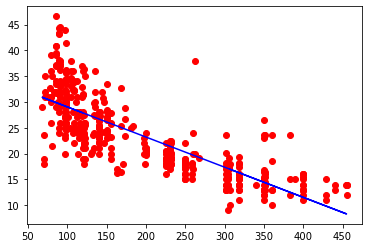

In [18]:
#Si pintamos la recta de regresion. 
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X), color = "blue")
print()

In [23]:
#A la hora de filtrar, el problema esta en aquellas puntos en donde el desplazamiento nos da un consumo elevado. 
data_auto[(data_auto["displacement"] > 250) & (data_auto["mpg"] > 35) ]
#este valor es el correspondiente al outlier. 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [24]:
data_auto[(data_auto["displacement"] > 300) & (data_auto["mpg"] > 20) ]
#Estos son los otros valores correspondientes a outliers. 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [25]:
data_auto_clean = data_auto.drop([395,258,305,372])

In [ ]:
#si volvemos a hacer la represetacion. 

In [26]:
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X = X[:, np.newaxis]

Y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())

In [27]:
lm = LinearRegression()
lm.fit(X,Y) 

LinearRegression()

In [28]:
lm.score(X,Y) #Si ha incrementado respecto al otro. 

0.6466514317531822

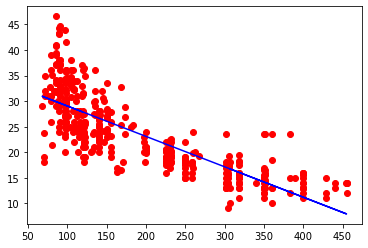

In [29]:
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X), color = "blue")
#Con esto hemos mejorado el modelo. 

In [ ]:
#El modelo puede mejorar mucho mas en terminos de R2. 
#Con haber elimnado 4 filas, hemos mejorado en un 2.5% el valor de R2, talvez todavia podemos mejorar mucho mas nuestro modelo. 

Este tema ha marcado el inicio de la introduccion a los algoritmos predictivos basados en la estadsitica, que basicamente son el cuerpo fundamental del modelado predictivo, algoritmos capaces de convertir a traves de expresiones matematicas. que ayudan a predecir datos del futuro, en base a datos historicos, estas ecuaciones son lo que llamamos "Un modelo predictivo". \
En este tema hemos visto, la forma mas sencilla y utilizada de elaborar un modelo predictivo, que es lo que llamamos; REGRESION LINEAL. \
En el que estan involucradas variables predictoras y predecidas. 
